In [1]:
import numpy as np
import scipy.integrate as integrate
import scipy.special as special
import matplotlib.pyplot as plt
import cmath

In [4]:
def Cauchy(z):
    s=integrate.quad(lambda x: (x-z.real)*np.exp(-x**2)/((x-z.real)**2+z.imag**2), -np.inf, np.inf)[0]
    s=s+1j*z.imag*integrate.quad(lambda x: np.exp(-x**2)/((x-z.real)**2+z.imag**2), -np.inf, np.inf)[0]
    return s/np.sqrt(np.pi)

I = np.vectorize(Cauchy)
def lambda_z(w, v, z):
    B=2/v**2
    A=1-1j*w/v
    return (1-(B*z**2)/A**2-z*B*(z**2-A/B)*I(z)/A**2)

In [5]:
def Cauchy1(t):
    #s=integrate.quad(lambda x: (x-z.real)*np.exp(-x**2)/((x-z.real)**2+z.imag**2), -np.inf, np.inf)[0]
    #s=s+1j*z.imag*integrate.quad(lambda x: np.exp(-x**2)/((x-z.real)**2+z.imag**2), -np.inf, np.inf)[0]
    return -2*special.dawsn(t) # s/np.sqrt(np.pi)


I1 = np.vectorize(Cauchy1)
def lambda_z_plus(w, v, z):
    B=2/v**2
    A=1-1j*w/v
    return (1-(B*z**2)/A**2-z*B*(z**2-A/B)*I1(z)/A**2)-np.sqrt(np.pi)*1j*z*B*(z**2-A/B)*np.exp(-z**2)/A**2
def lambda_z_minus(w, v, z):
    B=2/v**2
    A=1-1j*w/v
    return (1-(B*z**2)/A**2-z*B*(z**2-A/B)*I1(z)/A**2)+np.sqrt(np.pi)*1j*z*B*(z**2-A/B)*np.exp(-z**2)/A**2
lambda_z_minus=np.vectorize(lambda_z_minus)
lambda_z_plus=np.vectorize(lambda_z_plus)

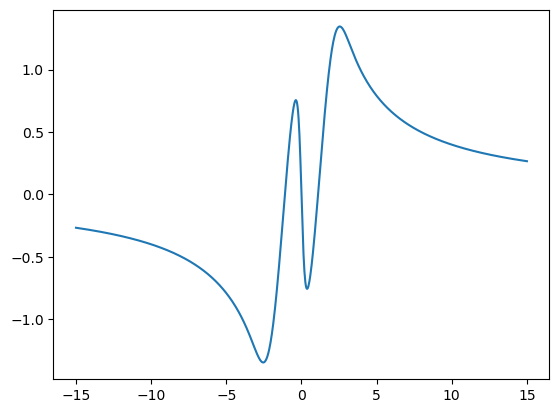

In [6]:
w=0.5
v=0.001
def y(w,v,t):
    return cmath.log((((t+1j)/(t-1j))**2)*lambda_z_plus(w, v, t)/lambda_z_minus(w, v, t)).imag
y=np.vectorize(y)
x=np.linspace(-15, 15,  1000)
plt.plot(x,y(w,v,x))

In [7]:
def Gamma(w, v, z):
    s=1j*integrate.quad(lambda x: (x-z.real)*y(w,v,x)/((x-z.real)**2+z.imag**2), -np.inf, np.inf)[0]
    s=s-z.imag*integrate.quad(lambda x: y(w,v,x)/((x-z.real)**2+z.imag**2), -np.inf, np.inf)[0]
    return s/(2*np.pi*1j)
gamma=np.vectorize(Gamma)
gamma(0.5, 0.001,0.01j)

array(0.15740413+1.78276586e-18j)

In [8]:
def root(w, v, z):
    B=2/v**2
    A=1-1j*w/v
    lambda_inf=1-1/A+1/(A*v)**2
    #print(lambda_inf)
    return cmath.sqrt(z**2-(lambda_z(w,v,z)*(z+1j)**2)/(cmath.exp(gamma(w,v,z))*lambda_inf))
root=np.vectorize(root)

In [9]:
root(0.99, 0.001, 1j)

array(0.21958941-8.53059291j)

In [10]:
v=0.001
x1=1j

w=np.linspace(0.99, 1.01, 200)
z=root(w,v,x1)

w1=np.linspace(0, 0.99, 30)
z1=root(w1,v,x1)

w2=np.linspace(1.01, 1.2, 30)
z2=root(w2,v,x1)

v=0.01

w3=np.linspace(0.9, 1.01, 150)
z3=root(w3,v,x1)

w4=np.linspace(0, 0.9, 30)
z4=root(w4,v,x1)

w5=np.linspace(1.01, 1.2, 30)
z5=root(w5,v,x1)

v=0.005

w6=np.linspace(0.95, 1.01, 180)
z6=root(w6,v,x1)

w7=np.linspace(0, 0.95, 30)
z7=root(w7,v,x1)

w8=np.linspace(1.01, 1.2, 30)
z8=root(w8,v,x1)

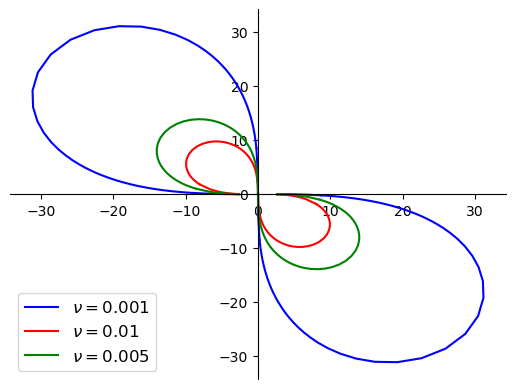

In [13]:
plt.plot(z.real,z.imag,color='blue',lw=1.5,  label=r'$\nu=0.001$')
plt.plot(-z.real,-z.imag,color='blue',lw=1.5)

plt.plot(z1.real,z1.imag,color='blue',lw=1.5)
plt.plot(-z1.real,-z1.imag,color='blue',lw=1.5)

plt.plot(z2.real,z2.imag,color='blue',lw=1.5)
plt.plot(-z2.real,-z2.imag,color='blue',lw=1.5)

plt.plot(z3.real,z3.imag,color='r',lw=1.5, label=r'$\nu=0.01$')
plt.plot(-z3.real,-z3.imag,color='r',lw=1.5)

plt.plot(z4.real,z4.imag,color='r',lw=1.5)
plt.plot(-z4.real,-z4.imag,color='r',lw=1.5)

plt.plot(z5.real,z5.imag,color='r',lw=1.5)
plt.plot(-z5.real,-z5.imag,color='r',lw=1.5)


plt.plot(z6.real,z6.imag,color='g',lw=1.5, label=r'$\nu=0.005$')
plt.plot(-z6.real,-z6.imag,color='g',lw=1.5)

plt.plot(z7.real,z7.imag,color='g',lw=1.5)
plt.plot(-z7.real,-z7.imag,color='g',lw=1.5)

plt.plot(z8.real,z8.imag,color='g',lw=1.5)
plt.plot(-z8.real,-z8.imag,color='g',lw=1.5)

ax = plt.gca()
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend(loc=3, prop={'size':12})

plt.show()
